### using urllib to read html data from webpages

In [1]:
from urllib.request import urlopen
x = urlopen('https://www.bbc.co.uk/')
k=x.read()

In [2]:
k

b'<!DOCTYPE html>\n<!--[if lte IE 9]>\n  <html lang="en-GB" class="no-js no-flexbox no-flexboxlegacy">\n<![endif]-->\n<!--[if gt IE 9]><!-->\n  <html lang="en-GB" class="no-js">\n<!--<![endif]-->\n<head>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><script type="text/javascript">\n      var _sf_startpt = (new Date()).getTime();\n    </script><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="The best of the BBC, with the latest news and sport headlines, weather, TV &amp; radio highlights and much more from across the whole of BBC Online" name="description"><meta content="BBC, British Broadcasting Corporation, BBCi, News, Sport, iPlayer, TV, Radio, Food, Music, Business, Arts, Bitesize, Lifestyle, Entertainment, Headlines" name="keywords"><meta property="og:title" content="BBC - Home"><meta property="og:type" content="website"><meta property="og:description" content="The best of the BBC, with the latest news and sport headlines, weat

In [3]:
parts=str(k).split("<a href=")

In [4]:
parts[1:5]

['"http://www.bbc.com/">Home</a></li><li class="orb-nav-newsdotcom">',
 '"https://www.bbc.com/news">News</a></li><li class="orb-nav-sport">',
 '"https://www.bbc.com/sport">Sport</a></li><li class="orb-nav-weather">',
 '"https://www.bbc.com/weather">Weather</a></li><li class="orb-nav-shop">']

In [5]:
for part in parts[1:5]:
    print(part.split('"')[1])

http://www.bbc.com/
https://www.bbc.com/news
https://www.bbc.com/sport
https://www.bbc.com/weather


In [6]:
in_links=[]
parts=str(k).split("<a href=")
for part in parts:
    link=part.split('"')[1]
    if "www.bbc" not in link:pass
    else:
        in_links.append(link)
in_links

['http://www.bbc.com/',
 'https://www.bbc.com/news',
 'https://www.bbc.com/sport',
 'https://www.bbc.com/weather',
 'http://www.bbc.com/earth/',
 'http://www.bbc.com/travel/',
 'http://www.bbc.com/capital/',
 'http://www.bbc.com/culture/',
 'http://www.bbc.com/future/',
 'http://www.bbc.co.uk/tv/',
 'http://www.bbc.co.uk/radio/',
 'https://www.bbc.co.uk/cbbc',
 'https://www.bbc.co.uk/cbeebies',
 'https://www.bbc.com/food/',
 'https://www.bbc.co.uk/education',
 'http://www.bbc.co.uk/music/',
 'http://www.bbc.co.uk/arts/',
 'http://www.bbc.co.uk/makeitdigital',
 'http://www.bbc.co.uk/taster',
 'http://www.bbc.com/nature/',
 'https://www.bbc.co.uk/news/localnews',
 'https://www.bbc.co.uk',
 'https://www.bbc.co.uk',
 'https://www.bbc.co.uk/news',
 'https://www.bbc.co.uk/sport',
 'https://www.bbc.co.uk/weather',
 'https://www.bbc.co.uk/iplayer',
 'https://www.bbc.co.uk/tv',
 'http://www.bbc.co.uk/radio',
 'https://www.bbc.co.uk/cbbc',
 'https://www.bbc.co.uk/cbeebies',
 'https://www.bbc.com

In [7]:
len(in_links)

147

In [8]:

in_links=set(in_links)
len(in_links)

120

### Accessing google search with urllib

In [9]:
url='https://www.google.com/search?q=python+programming+tutorials'
resp = urlopen(url)
respData = resp.read()
print(respData)

HTTPError: HTTP Error 403: Forbidden

In [10]:
from urllib.request import Request
url = 'https://www.google.com/search?q=python+programming+tutorials'

headers = {}
headers['User-Agent'] = r"Mozilla/5.0 (X11; Linux i686) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1312.27 Safari/537.17"

req = Request(url, headers = headers)
resp = urlopen(req)
respData = resp.read()

b'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>python programming tutorials - Google Search</title><script nonce="iZLtm9ZHqXMDQhJtyz6Iig==">(function(){window.google={kEI:\'CeYuW4XOEMr2vATNlI74Bw\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_CeYuW4XOEMr2vATNlI74Bw\',kGL:\'IN\'};google.kHL=\'en-IN\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="iZLtm9ZHqXMDQhJtyz6Iig==">(function(){google.lc=[];googl
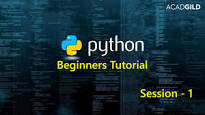
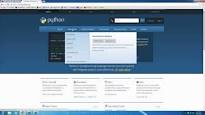
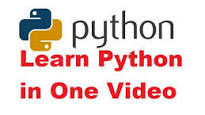
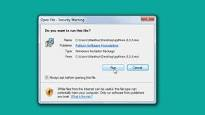
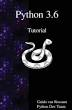
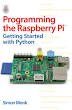
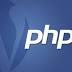
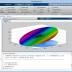
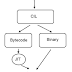
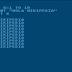

In [11]:
print(respData)

### Parsing with BeautifulSoup

In [12]:
from bs4 import BeautifulSoup

In [13]:
mydata=urlopen("https://in.finance.yahoo.com/q?s=SBIN.BO").read()
soup = BeautifulSoup(mydata,'lxml')

In [14]:
soup.findAll("a")

[<a class="Bgpx(0) Bgr(nr) Cur(p) D(b) H(35px) Bgz(702px) Mx(a)! W(92px)" data-reactid="12" href="https://in.finance.yahoo.com/" id="uh-logo"><b class="Hidden" data-reactid="13">Yahoo</b></a>,
 <a class="W(0) D(ib) Whs(nw) Pos(a) Bg(#500095) C(#fff) Op(0) W(a):f Op(1):f P(5px):f" data-reactid="28" href="#Navigation">Skip to Navigation</a>,
 <a class="W(0) D(ib) Whs(nw) Pos(a) Bg(#500095) C(#fff) Op(0) W(a):f Op(1):f P(5px):f" data-reactid="30" href="#market-summary">Skip to Market Summary</a>,
 <a class="W(0) D(ib) Whs(nw) Pos(a) Bg(#500095) C(#fff) Op(0) W(a):f Op(1):f P(5px):f" data-reactid="32" href="#Main">Skip to Main Content</a>,
 <a class="W(0) D(ib) Whs(nw) Pos(a) Bg(#500095) C(#fff) Op(0) W(a):f Op(1):f P(5px):f" data-reactid="34" href="#Aside">Skip to Related Content</a>,
 <a class="Pos(r) D(ib) Ta(s) Td(n):h" data-reactid="40" href="https://mail.yahoo.com/?.intl=in&amp;.lang=en-IN&amp;.partner=none&amp;.src=finance" id="uh-mail"><svg class="Cur(p)" data-icon="NavMail" data-r

In [15]:
all_links=soup.findAll("a")
for elem in all_links:
    link=str(elem.get('href'))
    print(link)

https://in.finance.yahoo.com/
#Navigation
#market-summary
#Main
#Aside
https://mail.yahoo.com/?.intl=in&.lang=en-IN&.partner=none&.src=finance
/quote/SBIN.BO?p=SBIN.BO
/quote/SBIN.BO/key-statistics?p=SBIN.BO
/quote/SBIN.BO/profile?p=SBIN.BO
/quote/SBIN.BO/financials?p=SBIN.BO
/quote/SBIN.BO/options?p=SBIN.BO
/quote/SBIN.BO/holders?p=SBIN.BO
/quote/SBIN.BO/history?p=SBIN.BO
/quote/SBIN.BO/analysis?p=SBIN.BO
/quote/SBIN.BO/sustainability?p=SBIN.BO
/quote/SBIN.BO/news?p=SBIN.BO
/quote/SBIN.BO/press-releases?p=SBIN.BO
/news/buy-state-bank-india-nse-070456700.html
/news/state-bank-india-nse-sbin-093646652.html
/news/state-bank-india-jumps-12-062533763.html
/news/state-bank-india-posts-1-083812982.html
/
/watchlists
/portfolios?bypass=true
/budget
/topic/latestnews
/personal-finance
/topic/tech
/topic/autos
/topic/videos


In [16]:
len(soup.findAll('table'))

2

In [17]:
mytable=soup.findAll('table')[0]
mytable.findAll('tr')

[<tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($c-fuji-grey-c) H(36px) " data-reactid="10"><td class="C(black) W(51%)" data-reactid="11"><span data-reactid="12">Previous close</span></td><td class="Ta(end) Fw(b) Lh(14px)" data-reactid="13" data-test="PREV_CLOSE-value"><span class="Trsdu(0.3s) " data-reactid="14">268.70</span></td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($c-fuji-grey-c) H(36px) " data-reactid="15"><td class="C(black) W(51%)" data-reactid="16"><span data-reactid="17">Open</span></td><td class="Ta(end) Fw(b) Lh(14px)" data-reactid="18" data-test="OPEN-value"><span class="Trsdu(0.3s) " data-reactid="19">268.00</span></td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($c-fuji-grey-c) H(36px) " data-reactid="20"><td class="C(black) W(51%)" data-reactid="21"><span data-reactid="22">Bid</span></td><td class="Ta(end) Fw(b) Lh(14px)" data-reactid="23" data-test="BID-value">0.00 x 0</td></tr>,
 <tr class="Bxz(bb) Bdbw(1px) Bdbs(s) Bdc($c-fuji-grey-c) H(36px) " data-reactid="

In [18]:
for rows in mytable.findAll('tr'):
    data=rows.findAll('td')
    print_data=[]
    for d in data:
        print_data.append(d.text)
    print(print_data)

['Previous close', '268.70']
['Open', '268.00']
['Bid', '0.00 x 0']
['Ask', '0.00 x 0']
["Day's range", '265.80 - 273.90']
['52-week range', '232.00 - 351.50']
['Volume', '775,701']
['Avg. volume', '1,398,598']


# Twitter API

<ol>
<li>Create a Twitter user account if you do not already have one. Make sure that you have added phone number to your account</li>
<li>Go to https://apps.twitter.com/ and log in with your Twitter user account. This step gives you a Twitter dev account under the same name as your user account.</li>
<li>Click “Create New App”</li>
<li>Fill out the form, agree to the terms, and click “Create your Twitter application”</li>
<li>In the next page, click on “Keys and Access Tokens” tab, and copy your “API key” and “API secret”. Scroll down and click “Create my access token”, and copy your “Access token” and “Access token secret”.</li>
</ol>

In [ ]:
# !pip install twitter

In [19]:
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream

In [20]:
twitter_info_file=r"/Users/lalitsachan/Dropbox/PDS V3/11. Web Scraping and text mining/twitter_acc_info.txt"

f=open(twitter_info_file,"r")
mykeys=[]

for line in f:
    mykeys.append(line.split(':')[1].strip())
print(mykeys)

['dHQxClNV7Zg90XyJ5Bj6ZR4IF', 'zHkTZsDqilUcDGddcDLX6PV38dHoPvSRTJ4Eo0cy8yydEMUSpa', '61981057-KajtcjIMGH49WpvizgWf0ELhVpaPauNeox7Hs5Ieu', '5ZagB6MJrwO2lnRu8g0buvzVd5p2DPguwrEjBEV49wNMq']


In [21]:
CONSUMER_KEY,CONSUMER_SECRET,ACCESS_TOKEN,ACCESS_SECRET=mykeys

you can very well manually assign values directly in the script instead of putting them in a file first 

In [22]:
oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
twitter= Twitter(auth=oauth)

In [23]:
# more details on the request parameters here :
# https://dev.twitter.com/rest/public/search
twitter.search.tweets(q='hyderabad monsoon', result_type='recent', lang='en',
                      count=3)
#can we convert these json dumps to pandas dataframes


{'search_metadata': {'completed_in': 0.023,
  'count': 3,
  'max_id': 1010662220080934912,
  'max_id_str': '1010662220080934912',
  'query': 'hyderabad+monsoon',
  'refresh_url': '?since_id=1010662220080934912&q=hyderabad%20monsoon&lang=en&result_type=recent&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': [{'contributors': None,
   'coordinates': None,
   'created_at': 'Sat Jun 23 23:13:45 +0000 2018',
   'entities': {'hashtags': [{'indices': [43, 53], 'text': 'Hyderabad'}],
    'symbols': [],
    'urls': [],
    'user_mentions': [{'id': 19252304,
      'id_str': '19252304',
      'indices': [3, 14],
      'name': 'Arvind Ramachander',
      'screen_name': 'arvindia4u'}]},
   'favorite_count': 0,
   'favorited': False,
   'geo': None,
   'id': 1010662220080934912,
   'id_str': '1010662220080934912',
   'in_reply_to_screen_name': None,
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_i

### Twitter Stream

In [24]:
twitter_stream = TwitterStream(auth=oauth)

In [25]:
import json
iterator = twitter_stream.statuses.sample()

tweet_count = 10
for tweet in iterator:
    tweet_count -= 1
    
    print(json.dumps(tweet) )
       
    if tweet_count <= 0:
        break 

{"delete": {"status": {"user_id": 950390010192318465, "id": 958789238916632579, "id_str": "958789238916632579", "user_id_str": "950390010192318465"}, "timestamp_ms": "1529800869060"}}
{"delete": {"status": {"user_id": 147300799, "id": 345647429477089280, "id_str": "345647429477089280", "user_id_str": "147300799"}, "timestamp_ms": "1529800869163"}}
{"delete": {"status": {"user_id": 1571095392, "id": 438429674394648576, "id_str": "438429674394648576", "user_id_str": "1571095392"}, "timestamp_ms": "1529800869285"}}
{"delete": {"status": {"user_id": 1179964843, "id": 308663256359260160, "id_str": "308663256359260160", "user_id_str": "1179964843"}, "timestamp_ms": "1529800869746"}}
{"in_reply_to_status_id": null, "favorite_count": 0, "in_reply_to_user_id_str": null, "user": {"notifications": null, "statuses_count": 97142, "utc_offset": null, "translator_type": "none", "name": "\u308a\u3087\u3046\u306b\u3083\u3093bot", "listed_count": 0, "favourites_count": 0, "screen_name": "ryo19790929_bot

### Tracking a specific keyword in stream

In [26]:
iterator = twitter_stream.statuses.filter(track="Mumbai Monsoon", language="en")
tweet_count = 3
for tweet in iterator:
    tweet_count -= 1
    
    print(json.dumps(tweet) )
       
    if tweet_count <= 0:
        break

KeyboardInterrupt: 

### trends API

In [27]:
world_trends = twitter.trends.available(_woeid=1)
world_trends[1:3]

[{'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Winnipeg',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'woeid': 2972},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Ottawa',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'woeid': 3369}]

In [28]:
hyd_trend=twitter.trends.place(_id = 2295414)

In [29]:
print(json.dumps(hyd_trend, indent=4))

[
    {
        "as_of": "2018-06-24T00:42:14Z",
        "trends": [
            {
                "tweet_volume": 541326,
                "url": "http://twitter.com/search?q=%23GERSWE",
                "name": "#GERSWE",
                "query": "%23GERSWE",
                "promoted_content": null
            },
            {
                "tweet_volume": null,
                "url": "http://twitter.com/search?q=%23ChinnaBabu",
                "name": "#ChinnaBabu",
                "query": "%23ChinnaBabu",
                "promoted_content": null
            },
            {
                "tweet_volume": null,
                "url": "http://twitter.com/search?q=%23GeethaGovindam",
                "name": "#GeethaGovindam",
                "query": "%23GeethaGovindam",
                "promoted_content": null
            },
            {
                "tweet_volume": null,
                "url": "http://twitter.com/search?q=%23BiggBossTelugu2",
                "name": "#BiggBos

### User API

In [30]:
# Get a list of followers of a particular user
twitter.followers.ids(screen_name="lalitsachan")

{'ids': [52296616,
  444773141,
  614985342,
  65789954,
  953144690,
  2192541036,
  149111248,
  140723981,
  519447054,
  475999445,
  2282790061,
  512566966,
  1691550589,
  1722018122,
  389315480,
  110192613,
  14207036,
  629338382,
  106166726,
  102301653,
  63419474,
  93499670,
  81534295,
  75756017,
  71741490,
  13623812,
  54273122],
 'next_cursor': 0,
 'next_cursor_str': '0',
 'previous_cursor': 0,
 'previous_cursor_str': '0'}

In [31]:
twitter.statuses.user_timeline(screen_name="lalitsachan")

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Sun Jan 21 10:14:07 +0000 2018',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [],
   'user_mentions': [{'id': 110192613,
     'id_str': '110192613',
     'indices': [0, 7],
     'name': 'Koushik Mandal',
     'screen_name': 'kshman'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 955020678712840192,
  'id_str': '955020678712840192',
  'in_reply_to_screen_name': 'kshman',
  'in_reply_to_status_id': 302169758873292800,
  'in_reply_to_status_id_str': '302169758873292800',
  'in_reply_to_user_id': 110192613,
  'in_reply_to_user_id_str': '110192613',
  'is_quote_status': False,
  'lang': 'und',
  'place': None,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'text': '@kshman yes',
  'truncated': False,
  'user': {'contributors_enabled': False,
   'created_at': 'Sat Aug 01 06:40:47 +0000 2009',
   'default_profi

# Exercises

* find out how to save files to your own machine using urllib
* find out how to convert json dumps to pandas dataframes